<a href="https://colab.research.google.com/github/rajeevfromkrec/deep_learning/blob/master/overfitting_and_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import imdb
import numpy as np


Using TensorFlow backend.


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

In [0]:
def vectorize_sequences(sequences, dimension=1000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
import tensorflow as tf
from keras import layers
from keras import models

In [0]:
model1= tf.keras.models.Sequential([
                                   
                                  tf.keras.layers.Dense(16,activation='relu',input_shape=(1000,)),
                                   tf.keras.layers.Dense(16,activation='relu'),
                                   tf.keras.layers.Dense(1,activation='sigmoid')

])

model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
model2= tf.keras.models.Sequential([
                                   
                                  tf.keras.layers.Dense(5,activation='relu',input_shape=(1000,)),
                                   tf.keras.layers.Dense(5,activation='relu'),
                                   tf.keras.layers.Dense(1,activation='sigmoid')

])

model2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:


model1_hist = model1.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=30,
                                   validation_data=(x_test, y_test),verbose=1)



Epoch 1/20
834/834 [==============================] - 5s 7ms/step - loss: 0.3834 - accuracy: 0.8335 - val_loss: 0.3358 - val_accuracy: 0.8587
Epoch 2/20
834/834 [==============================] - 5s 6ms/step - loss: 0.3217 - accuracy: 0.8635 - val_loss: 0.3266 - val_accuracy: 0.8594
Epoch 3/20
834/834 [==============================] - 6s 7ms/step - loss: 0.3072 - accuracy: 0.8719 - val_loss: 0.3317 - val_accuracy: 0.8575
Epoch 4/20
834/834 [==============================] - 6s 7ms/step - loss: 0.2928 - accuracy: 0.8799 - val_loss: 0.3353 - val_accuracy: 0.8567
Epoch 5/20
834/834 [==============================] - 5s 6ms/step - loss: 0.2785 - accuracy: 0.8876 - val_loss: 0.3389 - val_accuracy: 0.8563
Epoch 6/20
834/834 [==============================] - 5s 6ms/step - loss: 0.2643 - accuracy: 0.8955 - val_loss: 0.3617 - val_accuracy: 0.8489
Epoch 7/20
834/834 [==============================] - 5s 6ms/step - loss: 0.2489 - accuracy: 0.9048 - val_loss: 0.3672 - val_accuracy: 0.8516
Epoch 

In [13]:
model2_hist = model2.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=30,
                                   validation_data=(x_test, y_test),verbose=1)

Epoch 1/20
834/834 [==============================] - 5s 6ms/step - loss: 0.4051 - accuracy: 0.8237 - val_loss: 0.3276 - val_accuracy: 0.8618
Epoch 2/20
834/834 [==============================] - 5s 6ms/step - loss: 0.3225 - accuracy: 0.8649 - val_loss: 0.3243 - val_accuracy: 0.8624
Epoch 3/20
834/834 [==============================] - 5s 6ms/step - loss: 0.3146 - accuracy: 0.8696 - val_loss: 0.3246 - val_accuracy: 0.8605
Epoch 4/20
834/834 [==============================] - 5s 6ms/step - loss: 0.3095 - accuracy: 0.8707 - val_loss: 0.3257 - val_accuracy: 0.8610
Epoch 5/20
834/834 [==============================] - 5s 6ms/step - loss: 0.3045 - accuracy: 0.8728 - val_loss: 0.3249 - val_accuracy: 0.8609
Epoch 6/20
834/834 [==============================] - 5s 6ms/step - loss: 0.3011 - accuracy: 0.8749 - val_loss: 0.3337 - val_accuracy: 0.8573
Epoch 7/20
834/834 [==============================] - 5s 6ms/step - loss: 0.2974 - accuracy: 0.8759 - val_loss: 0.3292 - val_accuracy: 0.8587
Epoch 

In [0]:
epochs=range(1,21)
model1_val_loss=model1.history.history['val_loss']
model2_val_loss=model2.history.history['val_loss']


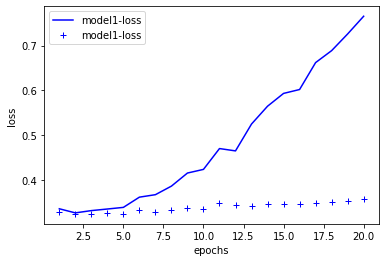

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(epochs,model1_val_loss,'b',label='model1-loss')
plt.plot(epochs,model2_val_loss,'b+',label='model1-loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


#Regularization


In [0]:
import tensorflow as tf
from keras import regularizers
l2=tf.keras.regularizers.l2(l=.001)
l1=tf.keras.regularizers.l1(l=.01)

In [0]:
l2_model= tf.keras.models.Sequential([
                                   
                                  tf.keras.layers.Dense(10,activation='relu',input_shape=(1000,),kernel_regularizer=l2),
                                   tf.keras.layers.Dense(10,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=.01,l2=.001)),
                                   tf.keras.layers.Dense(1,activation='sigmoid')

])

l2_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
l2_model_hist = l2_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=30,
                                   validation_data=(x_test, y_test),verbose=1)

Epoch 1/20
834/834 [==============================] - 6s 7ms/step - loss: 0.5757 - accuracy: 0.8077 - val_loss: 0.4612 - val_accuracy: 0.8442
Epoch 2/20
834/834 [==============================] - 6s 7ms/step - loss: 0.4194 - accuracy: 0.8628 - val_loss: 0.4095 - val_accuracy: 0.8628
Epoch 3/20
834/834 [==============================] - 6s 7ms/step - loss: 0.4007 - accuracy: 0.8666 - val_loss: 0.4080 - val_accuracy: 0.8594
Epoch 4/20
834/834 [==============================] - 6s 7ms/step - loss: 0.3899 - accuracy: 0.8694 - val_loss: 0.4257 - val_accuracy: 0.8453
Epoch 5/20
834/834 [==============================] - 6s 7ms/step - loss: 0.3820 - accuracy: 0.8693 - val_loss: 0.4014 - val_accuracy: 0.8566
Epoch 6/20
834/834 [==============================] - 6s 7ms/step - loss: 0.3748 - accuracy: 0.8687 - val_loss: 0.3902 - val_accuracy: 0.8580
Epoch 7/20
834/834 [==============================] - 6s 7ms/step - loss: 0.3671 - accuracy: 0.8717 - val_loss: 0.3787 - val_accuracy: 0.8593
Epoch 

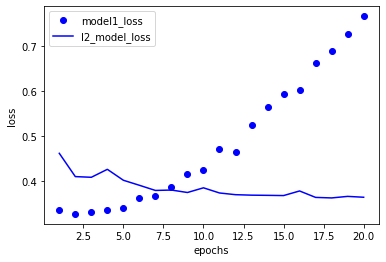

In [48]:
l2_model_val_loss=l2_model.history.history['val_loss']

plt.plot(epochs,model1_val_loss,'bo',label='model1_loss')
plt.plot(epochs,l2_model_val_loss,'b',label='l2_model_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()